## 数据探索

数据探索是竞赛的核心模块之一，贯穿竞赛始终，也是很多竞赛胜利的关键。   
在竞赛中如何确保自己准备好竞赛使用的算法模型？如何为数据集选择最合适的算法？如何定义可用于算法模型的特征变量？数据探索可以帮助回答以上这三点，并确保竞赛的最佳结果。   
数据竞赛可以概括为可视化数据集中重要特征的方法，一般来说分为三个部分：   
`数据初探`：帮助我们对数据有个整体性认识，并发现数据中存在的问题，比如缺失值、异常值和数据冗余等。   
`变量分析`：通过分析数据发现变量的特点，帮助提取有价值的特征，可以从单变量、多变量、变量分布进行分析。   
`模型分析`：可以分为重要性分析和结果误差分析，从结果中发现问题，并进一步优化。

### 1 数据初探
数据初探可以看作赛前数据探索，主要包含分析思路、分析方法和明确目的。通过系统化的探索，我们可以加深对数据的理解。

#### 1.1 分析思路
在实际竞赛中，最好使用多种探索思路和方法来探索每个变量并比较结果。在完全理解数据集后，就可以进入数据预处理阶段和特征提取阶段了，以便根据期望的业务结果转换数据集。
#### 1.2 分析方法
数据探索的分析主要采用以下方法：   
`单变量可视化分析`：提供原始数据集中每个字段的摘要统计信息。   
`多变量可视化分析`：用来了解不同变量之间的交互关系。   
`降维分析`：有助于发现数据中特征变量之间方差最大的字段，并可以在保留最大信息量的同时减少数据维度。   
通过这些方法，可以验证我们在竞赛中的假设，并确定尝试方向，以便理解问题和选择模型，并验证数据是否按照预期方式生成的。   
#### 1.3 明确目的
由于急着进入算法模型阶段，很多选手往往要么完全跳过数据探索阶段，要么只做一项非常肤浅的分析工作，这是大多数选手的一个非常严重且常见的错误。这种不考虑因素的行为可能会导致数据倾斜，出现异常值和过多的缺失值。对竞赛来说，这样会产生一些糟糕的结果：   
- 生成不准确的模型
- 在错误的数据上生成精确的模型
- 为模型选择错误的变量
- 资源的低效利用，包括模型的重建   
    
数据探索阶段必须要明确的7件事情：   
`数据集基本情况`：比如数据有多大，每个字段各是什么类型。   
`重复值、缺失值和异常值`：去除重复值、缺失值是否严重，缺失值是否具有特殊含义，如何发现异常值。   
`特征之间是否冗余`：比如身高的单位用cm和m表示就存在冗余。我们可以通过特征间相似性分析来找出冗余特征。   
`是否存在时间信息`：当存在时间信息时，通常要进行相关性、趋势性、周期性和异常点的分析，同时还有可能涉及潜在的数据穿越问题。   
`标签分布`：对于分类问题，是否存在类别分布不均衡。对于回归问题，是否存在异常值，整体分布如何，是否需要进行目标转换。   
`训练集与测试集的分布`：是否有很多在测试集中存在的特征字段在训练集中没有。   
`单变量/多变量分布`：熟悉特征的分布情况，以及特征和标签的关系。 

用`pandas`获取数据的基本描述：   
`DataFrame.describe()`：查看数据的基本分布，具体是对每列数据进行统计，统计值包含频次、均值、方差、最小值、分位数、最大值等。它有助于我们快速了解数据分布并发现异常值等信息。   
`DataFrame.head()`：可以直接加载数据集的前五行。   
`DataFrame.info()`：可以快速获得对数据集的简单描述，比如每个变量的类型、数据集的大小和缺失值情况。

In [46]:
# 展示nunique和缺失值情况
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
57,FireplaceQu,5,47.260274,47.260274,object
3,LotFrontage,110,17.739726,17.739726,float64
59,GarageYrBlt,97,5.547945,5.547945,float64
64,GarageCond,5,5.547945,90.821918,object
58,GarageType,6,5.547945,59.589041,object
60,GarageFinish,3,5.547945,41.438356,object


<AxesSubplot:>

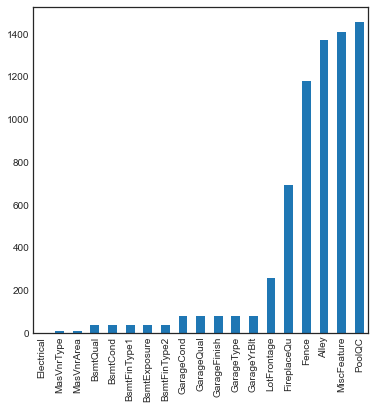

In [47]:
# 柱状图展现变量的缺失值分布情况
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True) # inplace 否在原对象基础上进行修改
missing.plot.bar()

### 2 变量分析
变量分析不仅是针对单个变量，更是分析变量之间的联系以及变量和标签的相关性，并进行假设检验，帮助我们提取有用的变量。   

#### 2.1 单变量分析
单变量可以分为`标签`、`连续型`和`类别型`。   
##### 2.1.1 标签
标签是最重要的变量，也是一次竞赛所追求的目标，我们首先应该观察标签的分布情况。

In [48]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

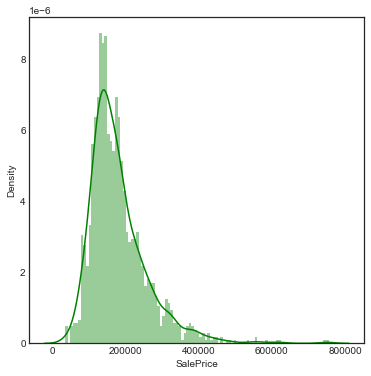

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['SalePrice'], color='g', bins=100)

可以看到，SalePrice呈偏正态分布，属于右倾斜类型，存在峰值状态，一些异常值在500000以上。我们最终会想办法去掉这些异常值，得出能够让模型很好地学习的、符合正态分布的变量。将SalePrice进行对数转换：

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

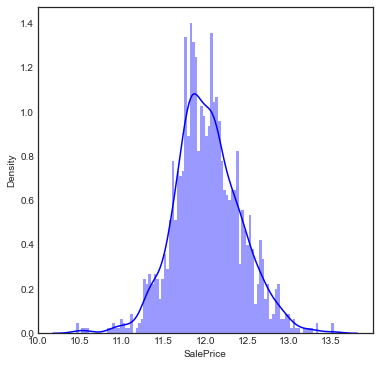

In [50]:
import numpy as np
sns.distplot(np.log(train['SalePrice']), color='b', bins=100)

##### 2.1.2 连续型
类似于标签的查看方式，这里主要使用直方图这种可视化方式观察值的分布、每个值出现的频率等。

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>]], dtype=object)

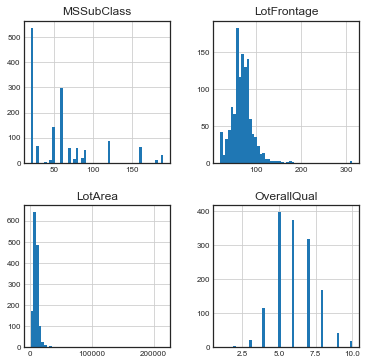

In [51]:
df_num = train.select_dtypes(include=['float64', 'int64'])
df_num = df_num[df_num.columns.to_list()[1:5]]
df_num.hist(bins=50, xlabelsize=8, ylabelsize=8)

接下来进行更加科学的分析，首先是相关性分析。值得注意的是，相关性分析只能比较数值特征，所以对于字母或字符串特征，需要先编码，并将其转换为数值，然后再看特征之间到底有什么关联。在实际竞赛中，相关性分析能够很好的过滤掉与标签没有直接关系的特征，在竞赛中均有很好的效果。

观察一个相关性分析的可视化图时，需要了解这个图代表什么，能够从中获取最基本的信息：正相关和负相关。   
`正相关`：一个特征的增加导致另一个特征增加，则它们呈正相关。   
`负相关`：一个特征的增加导致另一个特征减少，则它们呈负相关。   
假设特征A和特征B完全正相关，这意味着这两个特征包含高度相似的信息，信息中几乎没有或者完全没有差异。在搭建或训练模型时，如果同时使用这两个特征，可能其中一个会是多余的。我们应该尽量消除冗余特征，因为它会使训练时间变长，同时一些其他优势也会变没。

<AxesSubplot:>

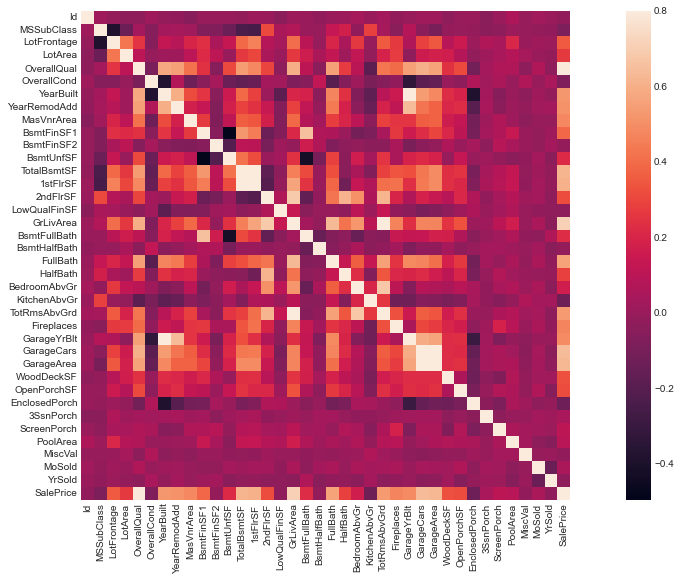

In [52]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

从图中可以看出`OverallQual（总评价）`、`GarageCars（车库）`、`TotalBsmtSF（地下室面积）`、`GrLivArea（生活面积）`等特征与`SalePrice`呈正相关，这也非常符合我们对业务的直觉。

##### 2.1.3 类别型
数据探索的目的是帮助我们了解数据并构建有效特征。我们找到了与标签有着强相关的特征，那么就可以围绕着这个强相关特征进行一系列的扩展，具体可以进行交叉组合，比如强相关加弱相关、强相关加强相关等组合，挖掘更高维度的潜在信息。   

C:\Users\panda\AppData\Local\Temp\ipykernel_11228\3662204353.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\panda\AppData\Local\Temp\ipykernel_11228\3662204353.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\panda\AppData\Local\Temp\ipykernel_11228\3662204353.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\panda\AppData\Local\Temp\ipykernel_11228\3662204353.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\panda\AppData\Local\Temp\ipykernel_11228\3662204353.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xa

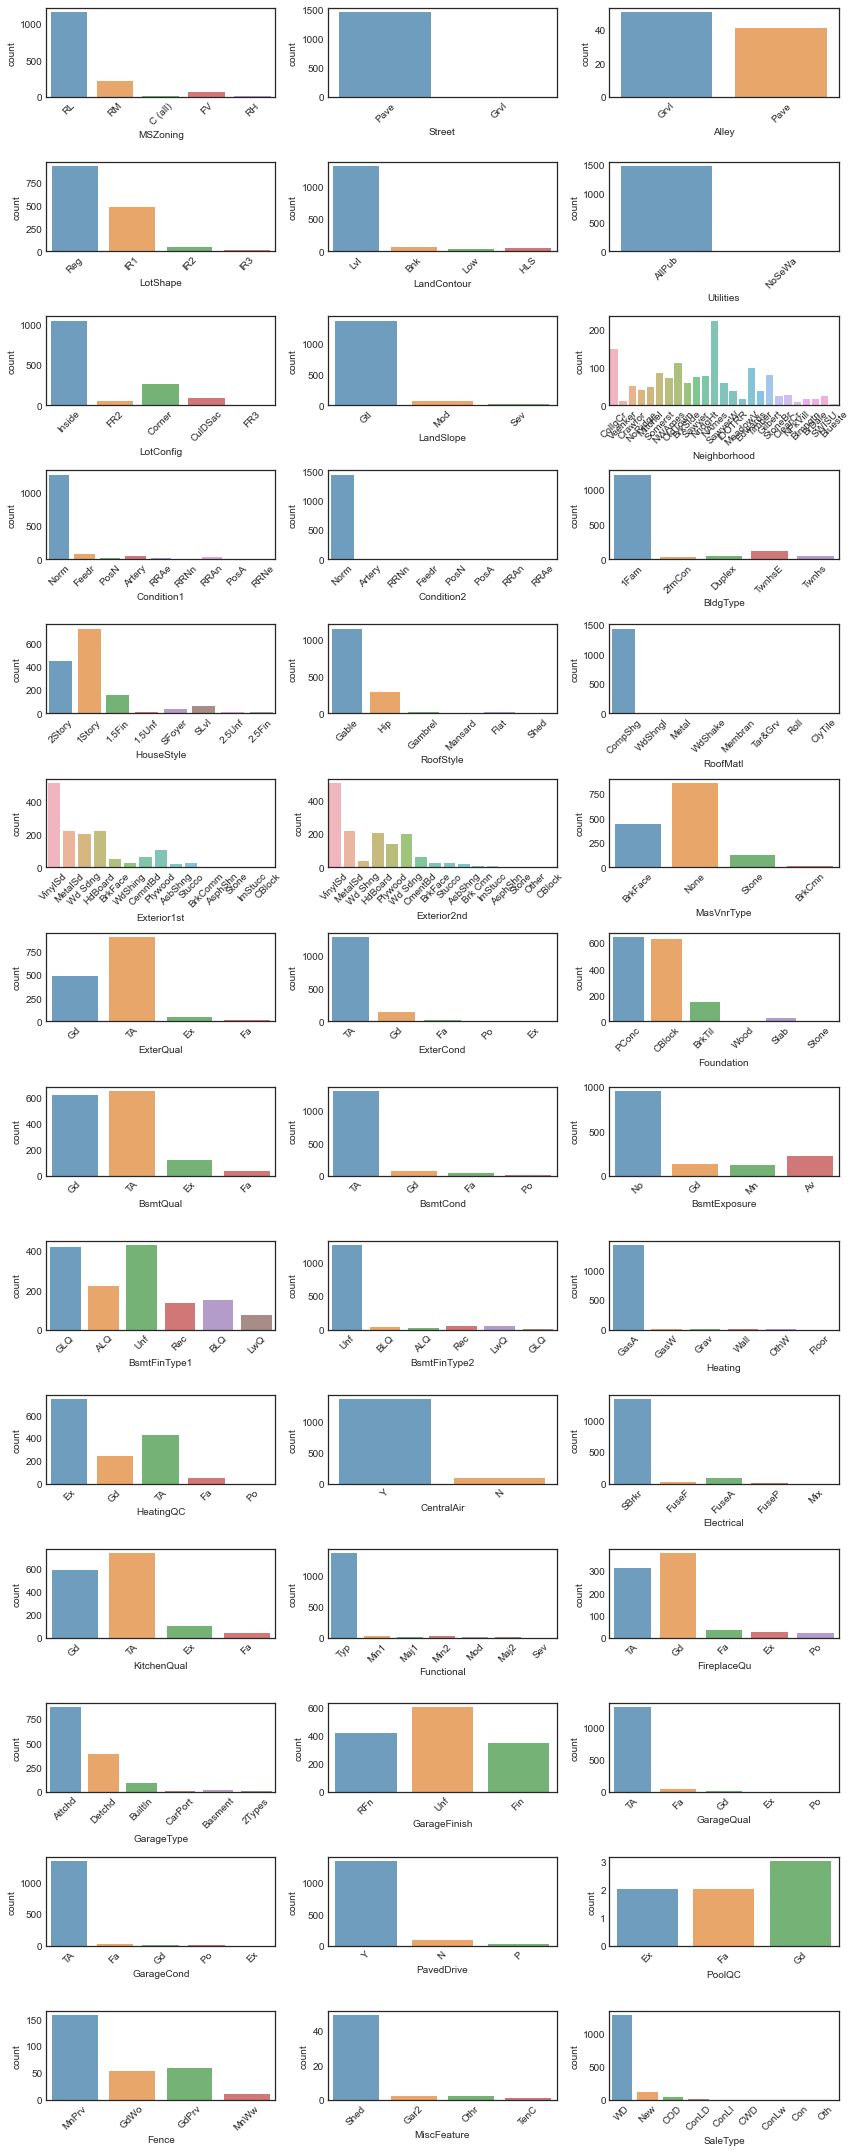

In [53]:
df_not_num = train.select_dtypes(include = ['object'])
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

#### 2.2 多变量分析
单变量分析太过单一，不足以挖掘变量之间的内在联系，获取更多更细粒度的信息，所以多变量分析就成了必须。分析特征变量与特征变量之间的关系有助于构建更好的特征，同时降低构建冗余特征的概率。   
从上面的相似性矩阵中，我们了解到房屋评价与SalePrice呈正相关。进一步扩展分析，考虑房屋评价和房屋位置是否存在某种联系，画出不同房屋位置的评价分布条状图，并进一步观察不同位置房屋的SalePrice。

<AxesSubplot:xlabel='Neighborhood'>

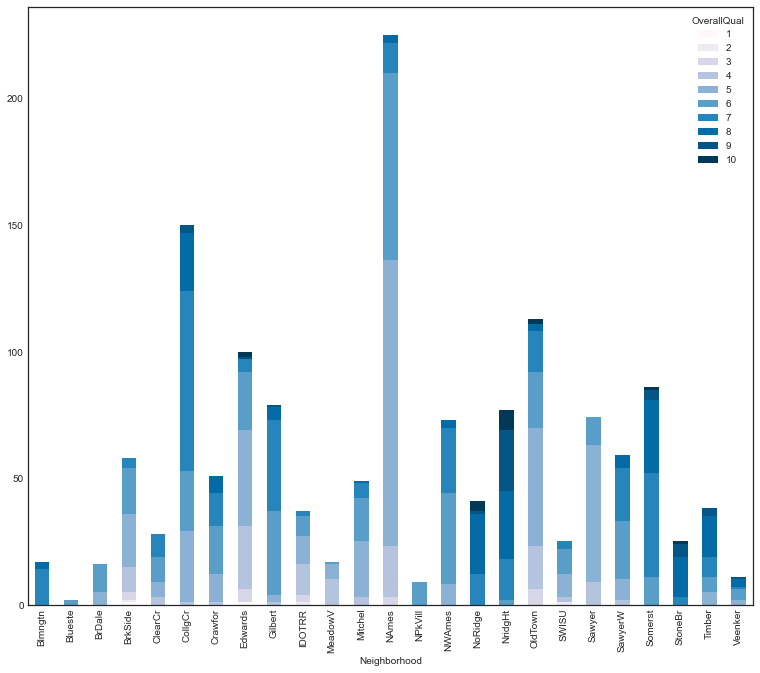

In [54]:
plt.style.use('seaborn-white')
type_cluster = train.groupby(['Neighborhood', 'OverallQual']).size()
type_cluster.unstack().plot(kind='bar', stacked=True, colormap= 'PuBu',figsize=(13, 11))

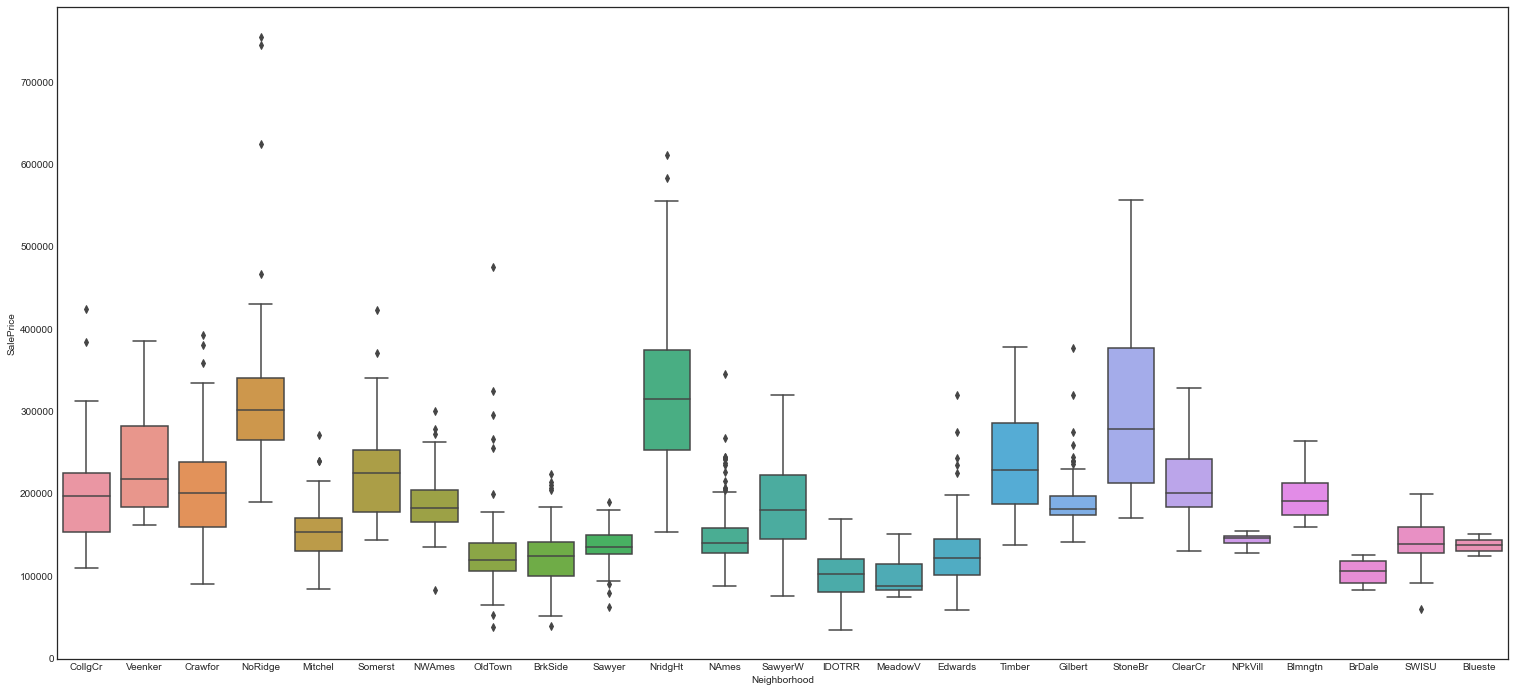

In [55]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

完全符合我们的直觉，高评价位置（NoRidge、NridgHt和StoneBr）对应高SalePrice，这也说明房屋位置评价与房屋售价有比较强的相关性。那么我们可以构建这两个类别特征的交叉组合特征来进行更细致的描述，也可以构造这个组合特征下的房屋均价等。

### 3 模型分析
#### 3.1 学习曲线
学习曲线能够反映训练集和验证集在训练迭代中的分数变化情况，帮助我们快速了解模型的学习效果，我们可以通过学习曲线来观察模型是否过拟合，通过判断拟合程度来确定如何改进模型。   
#### 3.2 特征重要性分析
通过模型训练可以得到特征重要性。对于树模型（比如LightGBM和XGBoost）。通过计算特征的信息增益或分裂次数得到特征的重要性得分。对于模型LR和SVM，利用特征系数作为特征重要性得分，例如LR，每个特征各对应一个系数w，w越大，那么该特征对模型预测结果的影响就越大，就可以认为该特征越重要。   
对特征重要性的分析也可用于业务理解，有些奇怪的特征在模型中起着关键的作用，可以帮助我们更好地理解业务。同时如果有些特征反常规，那么我们也可以看出来可能它们就是过拟合的特征。   

<AxesSubplot:>

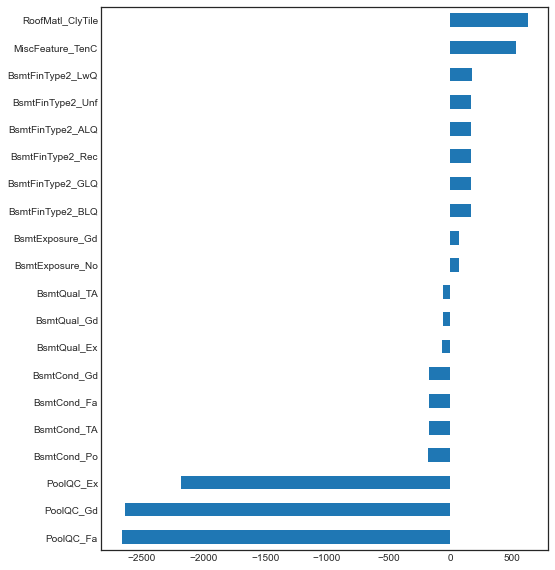

In [56]:
all_data = pd.concat((train, test))
all_data = pd.get_dummies(all_data) # 实现onehot encoding
all_data = all_data.fillna(all_data.mean()) # 填充缺失值
X_train, x_test = all_data[:train.shape[0]], all_data[train.shape[0]:] # 数据切分
y = train.SalePrice

from sklearn.model_selection import cross_val_score
# rmse均方根误差
# cv交叉验证
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()
coef = pd.Series(model_lasso.coef_, index=X_train.columns)
# coef 筛选出自变量系数不为0的系数
sum(coef!=0)

import matplotlib
import matplotlib.pyplot as plt
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

如图是Lasso模型训练中每个特征的系数情况，与SalePrice具有高相关的特征是GrLivArea（房屋居住面积），这是非常符合我们直觉的，房屋面积越大，售价自然也越高。还有一些位置特征，比如街道StoneBr、NridgHt、NoRidge也起到了正向作用。当然也存在很多负向特征，这些消极的特征是没有太多意义的，通常可以直接剔除掉。

#### 3.3 误差分析
误差分析是我们通过模型预测结果来发现问题的关键。一般而言，在回归问题中就是看预测结果的分布，在分类问题中就是看混淆矩阵等。这么做可以帮助我们找到模型对于哪些样本或者哪类样本预测能力不够从而导致结果不准确，然后分析造成结果误差的最可能因素，最终修正训练数据和模型。

<AxesSubplot:xlabel='preds', ylabel='residuals'>

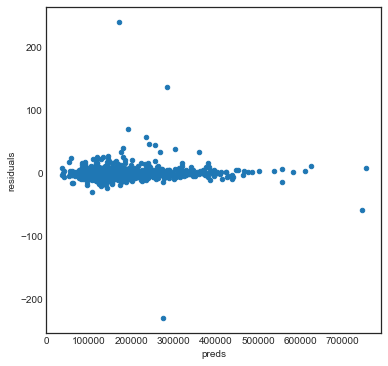

In [60]:
# 接下来观察真实结果与预测结果的残差
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

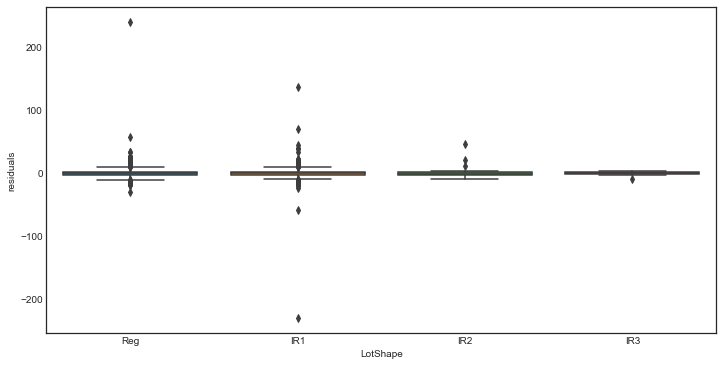

In [58]:
# 寻找误差的来源
train = pd.concat([train,preds], axis=1)
var = 'LotShape'
data = pd.concat([train['residuals'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="residuals", data=data)